# Esercizio 1

1. Scaricare e importare il dataset capelli.csv
2. Usare le funzioni predefinite di R calcolate covarianza e correlazione tra la lunghezza e le altre misure.
3. Fare dei grafici a dispersione per confermare la vostra ipotesi
4. Fare un boxplot e un istogramma della colonna della spesaShampoMensile, cosa li accomuna?
5. Fare un grafico a torta della probabilità di fidanzamento dividendo in 3 blocchi i dati in questo modo:
    * nell’intervallo [0,0.3] uncool
    * tra (0.3,0.6] normali
    * tra (0.6,1] cool

In [20]:
capelli <- read.csv(file = "capelli.csv")
str(capelli)

'data.frame':	1000 obs. of  4 variables:
 $ spesaShampoMensile: num  15.8 12.4 13.1 12.4 0 ...
 $ lunghezzaCapelli  : int  9866 1787 6242 4878 6800 7430 2778 4253 7108 572 ...
 $ spesaTaglioMensile: num  2.35 25.39 13.27 17.07 11.1 ...
 $ probFidanzamento  : num  0.575 0.745 0.49 0.48 0.59 0.475 0.685 0.725 0.135 0.45 ...


In [21]:
cov(capelli$lunghezzaCapelli, capelli, use="complete")

spesaShampoMensile,lunghezzaCapelli,spesaTaglioMensile,probFidanzamento
4031.191,7986960,-23962.05,-11.49176


In [22]:
cor(capelli$lunghezzaCapelli, capelli, use="complete")

spesaShampoMensile,lunghezzaCapelli,spesaTaglioMensile,probFidanzamento
0.8013925,1,-0.9958021,-0.01860445


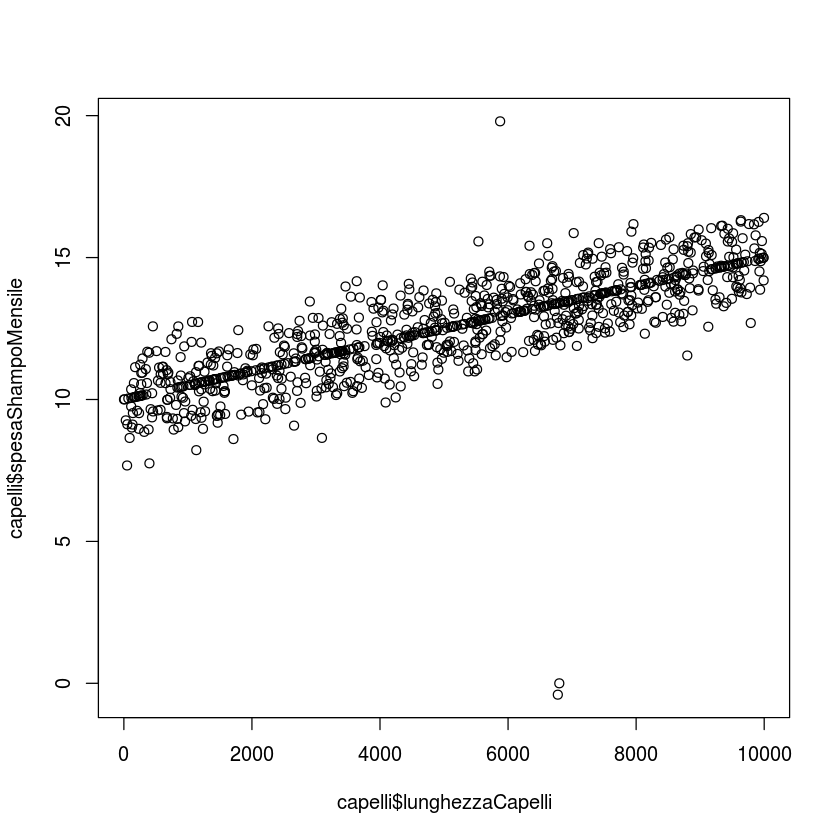

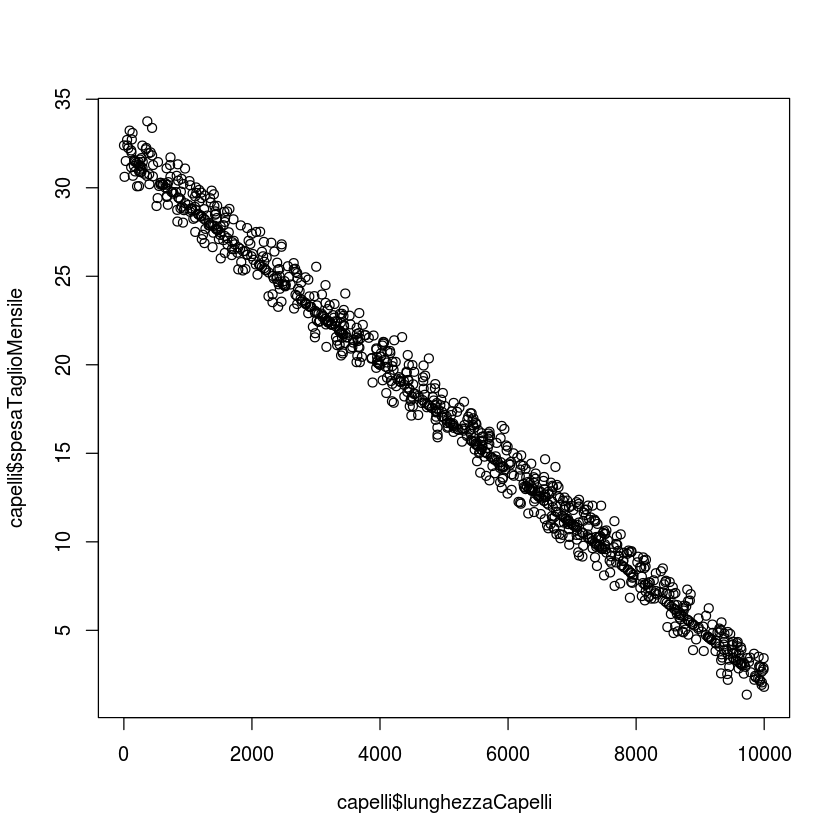

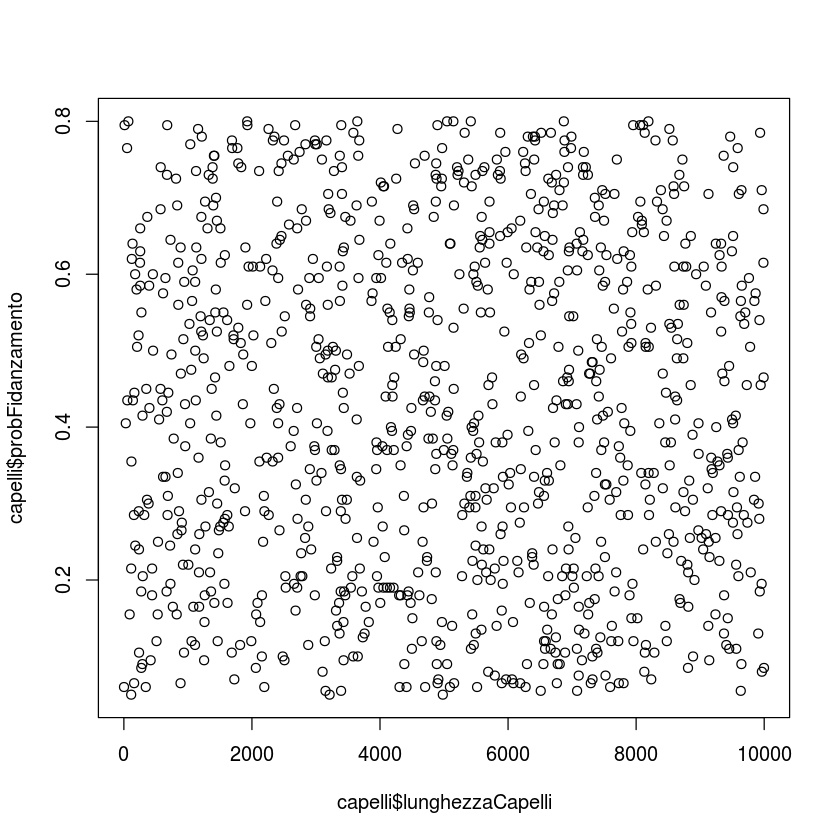

In [23]:
plot(capelli$lunghezzaCapelli, capelli$spesaShampoMensile)
plot(capelli$lunghezzaCapelli, capelli$spesaTaglioMensile)
plot(capelli$lunghezzaCapelli, capelli$probFidanzamento)

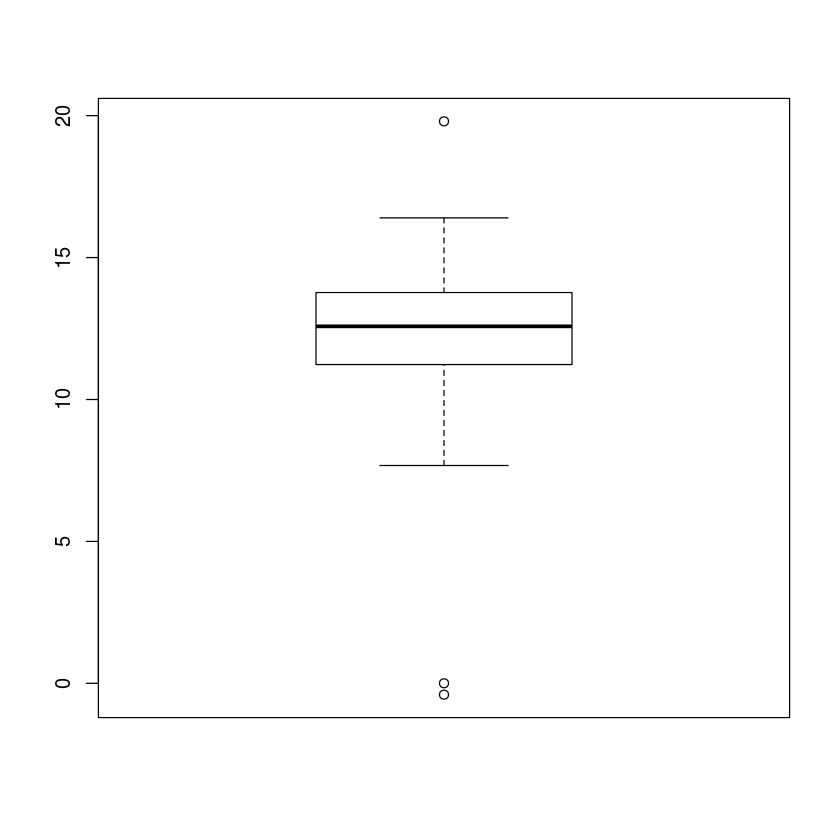

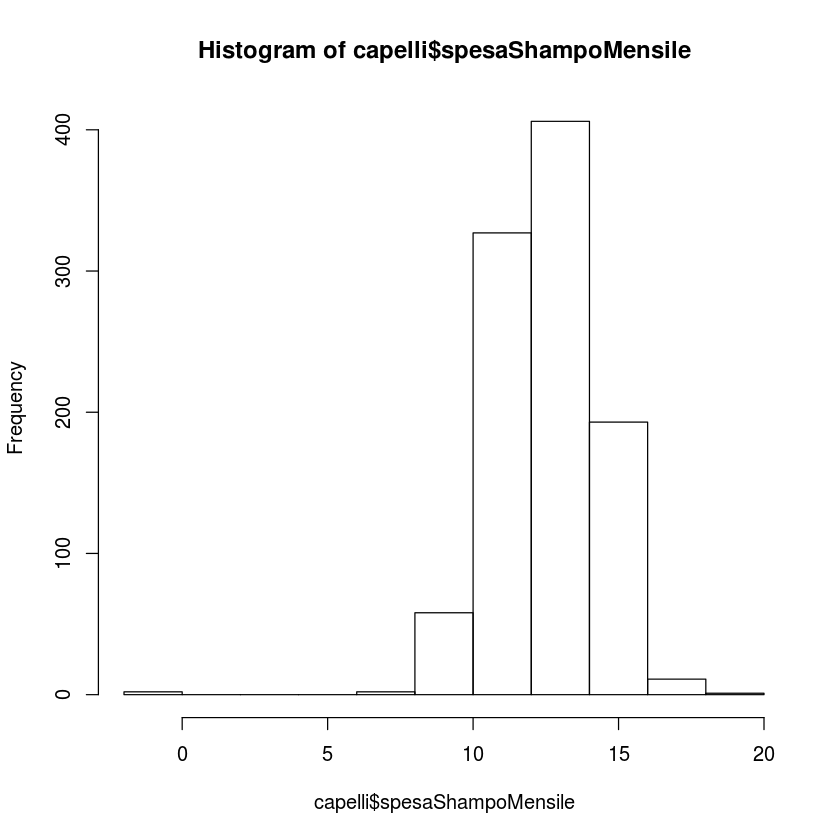

In [24]:
boxplot(capelli$spesaShampoMensile)
hist(capelli$spesaShampoMensile)

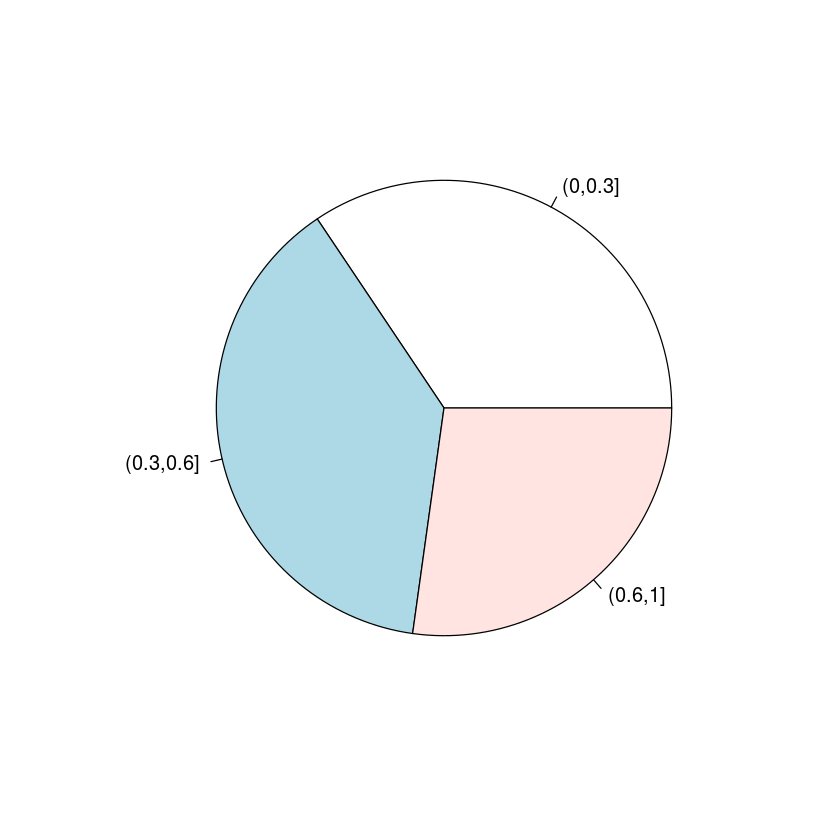

In [25]:
vettoreBreaks <- c(0, 0.3, 0.6, 1)
pie(table(cut(capelli$probFidanzamento, breaks=vettoreBreaks)))

# Esercizio 2 (really hard)

Per questo esercizio è necessario aver compreso molto bene la teoria.

1. Scaricare e importare il dataset datiClassificatore.csv
2. Visualizzare le prime 6 righe del dataframe
3. Calcore specificity e sensibility al variare della soglia.
4. Fare un plot della curva di ROC
5. Quale valore sembra ragionevole da usare come soglia per il nostro classificatore?

In [26]:
dati <- read.csv(file = "daticlassificatore.csv")
str(dati)

'data.frame':	21001 obs. of  3 variables:
 $ fidanzato: int  0 0 0 0 1 0 0 1 0 1 ...
 $ stima    : int  0 1 1 1 1 1 1 1 1 1 ...
 $ soglia   : num  0 0 0 0 0 0 0 0 0 0 ...


In [27]:
dati[1:6,]

fidanzato,stima,soglia
0,0,0
0,1,0
0,1,0
0,1,0
1,1,0
0,1,0


In [28]:
specificity <- c()
sensitivity <- c()
for (s in unique(dati$soglia)) {
    falsipos <- sum(dati$soglia==s & dati$stima==1 & dati$fidanzato==0)
    falsineg <- sum(dati$soglia==s & dati$stima==0 & dati$fidanzato==1)
    veripos <- sum(dati$soglia==s & dati$stima==1 & dati$fidanzato==1)
    verineg <- sum(dati$soglia==s & dati$stima==0 & dati$fidanzato==0)
    specificity <- c(specificity, if (verineg+falsipos!=0) verineg / (verineg + falsipos) else 1)
    sensitivity <- c(sensitivity, if (veripos+falsineg!=0) veripos / (veripos + falsineg) else 1)
}
cl <- data.frame(soglia = unique(dati$soglia), spec = specificity, sens = sensitivity)
str(cl)

'data.frame':	21 obs. of  3 variables:
 $ soglia: num  0 0.05 0.1 0.15 0.2 0.25 0.3 0.35 0.4 0.45 ...
 $ spec  : num  0.00207 0 0.07867 0.17598 0.26294 ...
 $ sens  : num  1 1 0.977 0.942 0.911 ...


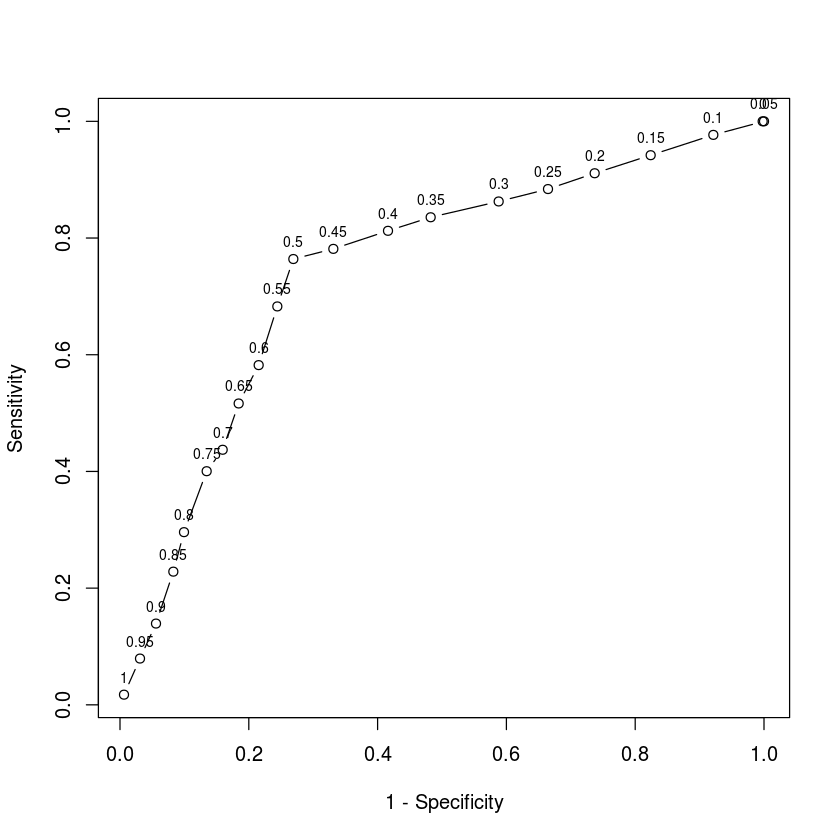

In [29]:
plot(1-cl$spec, cl$sens, xlab = "1 - Specificity", ylab = "Sensitivity", type = "b")
text(1-cl$spec, cl$sens, labels=cl$soglia, cex=0.7, pos=3)